In [12]:
import json
import pandas as pd
from augur.utils import json_to_tree
import seaborn as sns
import matplotlib.pyplot as plt
tree_file = '../../../../nextstrain-build/phylogenetic_only_camels/auspice/mers.json'

In [13]:
tree_file = '../../../../nextstrain-build/phylogenetic_only_camels/auspice/mers.json'
#read in the tree
with open(tree_file, 'r') as f:
    tree_json = json.load(f)

#put tree in Bio.phylo format
tree = json_to_tree(tree_json)

samples_in_clade = {}
target_clade = tree.find_any(name='NODE_0000053')
isolated_clade = tree.common_ancestor(target_clade)
muts_on_branch = {}

RecursionError: maximum recursion depth exceeded

In [ ]:
# iterate through terminal branches on the tree to find what mutations are there
for terminal in isolated_clade.find_clades(terminal=True): 
    date = terminal.node_attrs.get('num_date', {})
    date_value = date.get('value', {})

    muts_on_branch[terminal.name] = {'date': date_value}
    # get the mutations on this node from the 'branch_attrs'
    ### write code here
    muts = terminal.branch_attrs.get('mutations', {})
    for gene, mutations in muts.items():
        if gene != 'nuc':
            continue
        # Ensure the node and gene are initialized in the dictionary
        if terminal.name not in muts_on_branch:
            muts_on_branch[terminal.name] = {}
        if gene not in muts_on_branch[terminal.name]:
            muts_on_branch[terminal.name][gene] = mutations


nuc
ExoN
N
NendoU
Nsp2
Nsp3
Nsp4
Nsp8
ORF1a
ORF1b
Orf4b
Orf5
Orf8b
S1
S2
Spike
nuc
nuc
Nsp2
ORF1a
nuc
Nsp3
ORF1a
nuc
M
S2
Spike
nuc
Nsp2
ORF1a
S1
S2
Spike
nuc
Orf5
nuc
2Omethyltransferase
ExoN
NendoU
Nsp2
Nsp3
Nsp4
Nsp8
ORF1a
ORF1b
Orf4b
Orf8b
RdRpb
S1
S2
Spike
nuc
Nsp3
ORF1a
nuc
nuc
N
Nsp2
Nsp3
Nsp4
ORF1a
ORF1b
Orf3
Orf4b
Orf8b
RdRpb
S1
S2
Spike
nuc
Nsp3
ORF1a
nuc
Nsp3
ORF1a
nuc
Orf4b
nuc
M
Nsp3
ORF1a
Orf4b
S2
Spike
nuc
NendoU
Nsp6
ORF1a
ORF1b
Orf4a
Orf4b
Orf5
RdRpb
nuc
nuc
nuc
NendoU
ORF1b
S1
Spike
nuc
Hel
Nsp3
ORF1a
ORF1b
nuc
nuc
nuc
nuc
S1
Spike
nuc
ExoN
ORF1b
nuc
Nsp3
ORF1a
nuc
nuc
Nsp3
ORF1a
nuc
Nsp4
ORF1a
nuc
Nsp2
ORF1a
Orf3
nuc
nuc
Nsp3
ORF1a
Orf8b
nuc
N
Orf3
Orf8b
S2
Spike
nuc
Nsp4
ORF1a
nuc
S2
Spike
nuc
nuc
Nsp3
ORF1a
S2
Spike
nuc
nuc
nuc
Hel
N
Nsp2
Nsp3
ORF1a
ORF1b
nuc
NendoU
ORF1b
Orf3
nuc
nuc
Hel
M
N
NendoU
Nsp2
Nsp3
Nsp6
Nsp8
ORF1a
ORF1b
Orf3
Orf4b
Orf5
S1
S2
Spike
nuc
Nsp2
Nsp3
ORF1a
Orf3
S1
S2
Spike
nuc
ExoN
NendoU
Nsp2
Nsp3
ORF1a
ORF1b
Orf3
Orf4a
Orf4b
Orf5
Orf8b
RdRpb

In [ ]:
mut_counts = {
    'A_to_T': 0, 'A_to_G':  0, 'A_to_C': 0,
    'C_to_T': 0, 'C_to_A': 0, 'C_to_G': 0,
    'G_to_A': 0, 'G_to_T': 0, 'G_to_C': 0,
    'T_to_A': 0, 'T_to_G': 0, "T_to_C": 0
}

for sample, info in muts_on_branch.items():
    for mut in info.get('nuc', {}):
        key = f"{mut[0]}_to_{mut[-1]}"
        if key in mut_counts:
            mut_counts[key] += 1

data = []
for mut, count in mut_counts.items():
    data.append({'Mutation': mut, 'Count': count})

df = pd.DataFrame(data)


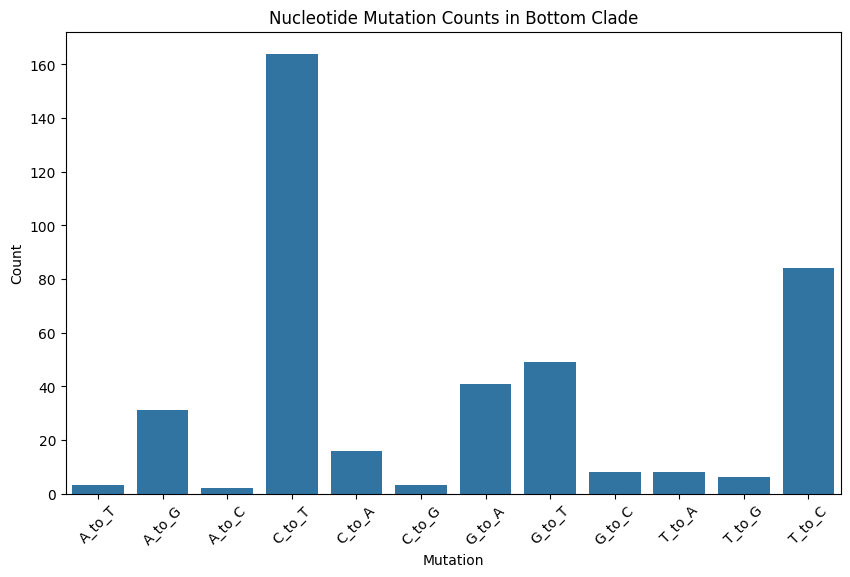

In [ ]:
# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutation', y='Count', data=df)

# Customize the plot
plt.title('Nucleotide Mutation Counts in Bottom Clade')
plt.xlabel('Mutation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()